In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None

In [2]:
df=pd.read_csv('D:/datasets+minipro/analytics vidhya datasets/credit card defaulter/ccdeftrain.csv')

dfte=pd.read_csv('D:/datasets+minipro/analytics vidhya datasets/credit card defaulter/ccdtest.csv')
dftecp=dfte.copy()

In [3]:
df.drop('ID',axis=1,inplace=True) # ID feature will not be useful,so it is dropped
dfte.drop('ID',axis=1,inplace=True)# ID feature will not be useful,so it is dropped

In [4]:
df['EDUCATION'].value_counts()
# Since, 5 & 6 are already unknown as given in the summary of data,we can club them together instead of keeping 
# them separate
# So,We get only 0 to 5 categoies only in education feature.
# Below code clubs the unknown datatype together!
df['EDUCATION']=df['EDUCATION'].replace({6:4,5:4,0:4})
dfte['EDUCATION']=dfte['EDUCATION'].replace({6:4,5:4,0:4})

In [5]:
df['EDUCATION'].value_counts()

2    9789
1    7415
3    3467
4     329
Name: EDUCATION, dtype: int64

In [6]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})
dfte['MARRIAGE']=dfte['MARRIAGE'].replace({0:3})

In [7]:
# To check if any null values are there or not!
for i in df.columns:
    if (df[i].isnull().sum()>0):
        print(i)

In [8]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [9]:
# # Fixing the values,treating -2,-1,0 as 0 only..
# for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
#     df[i]=df[i].replace({-2:0,-1:0,0:0})

In [10]:
# for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
#     dfte[i]=dfte[i].replace({-2:0,-1:0,0:0})

In [11]:
# for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
#     print(dfcp[i].value_counts())

# EDA:

In [12]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [13]:
df[(df['AGE']>60)].shape # There are around 188 old people in given data set

(188, 24)

In [14]:
# Lets create a new feature to check if age has any relation with target(defaulting loan or not!)
def conv(x):
    if x>20 and x<=40:
        return 'Adult'
    elif x>40 and x<60:
        return 'Old'
    else:
        return 'Senior citizen'
df['NEWAGE']=df['AGE'].apply(conv)

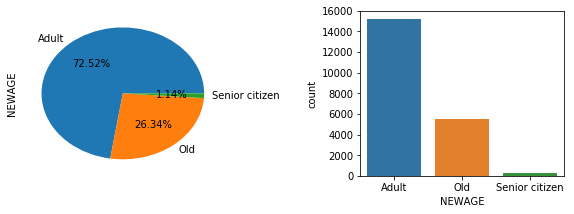

In [15]:
# df['NEWAGE'].value_counts().plot(kind='pie',autopct='%1.2f%%')
# plt.show()
# sns.countplot(df['NEWAGE']) 
# plt.show()

fig,axes=plt.subplots(1,2,figsize=(10,5))
df['NEWAGE'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
sns.countplot(df['NEWAGE'],ax=axes[1])
fig.tight_layout(pad=8)
plt.show()

# There are more adults as compared to old people above 40 and below 60
# There are very low senior citizens

E:\anaconda navigator\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


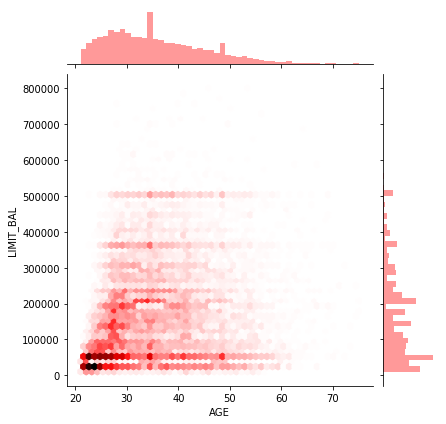

In [16]:
sns.jointplot(df['AGE'],df['LIMIT_BAL'],kind='hex',color='red') 
# As we can observe from jointplot, The hexagons are darker between age group 20 to 35 and range of balance 
# given to these age groups is upto 1,00,000,So,majodata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAj4AAADWCAYAAADRuohqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3Xl8VOXZ//HPdybsqMiiomAHK+5alxTXKlpr1dhiq7ZSW7Han1201lptp8tT49I2Vm3dqpYqLk/7uNTaSjtu1LXugguIVkUZJYICAmENkOT6/XHuwBAmmQCZOUnmer9e82LmPvc55zoBkiv3KjPDOeecc64cJOIOwDnnnHOuVDzxcc4551zZ8MTHOeecc2XDEx/nnHPOlQ1PfJxzzjlXNjzxcc4551zZ8MTHOecASRMkzZX0Wovy70t6U9J0Sb/NKf+ppBnh2Odzyo8OZTMkpXPKR0h6XtLbku6S1LM0T+acy+WJj3PORW4Fjs4tkHQ4MAbYy8x2B64I5bsBJwO7h3Oul5SUlAT+ABwD7AaMDXUBLgN+b2YjgYXAGUV/Iufcejzxcc45wMyeBBa0KP4uUGNmK0OduaF8DHCnma00s5nADGBUeM0ws3fNbBVwJzBGkoAjgHvC+bcBxxf1gZxzeXni45xzrdsJ+EzoonpC0qdD+XbArJx6taGstfJBwCIza2hR7pwrsYq4A3DOuU6sAtgSOAD4NHC3pB0A5alr5P9l0tqovx5JZwJnAvTr12+/XXbZZSPCdq78TJkyZb6ZDSlUzxMf55xrXS1wr0WbGr4gqQkYHMqH59QbBswO7/OVzwcGSKoIrT659ddhZuOB8QCVlZU2efLkDnwc57ovSe+1p553dTnnXOv+QTQ2B0k7AT2JkpiJwMmSekkaAYwEXgBeBEaGGVw9iQZATwyJ02PAieG644D7SvokzjnAW3yccw4ASXcAo4HBkmqBC4EJwIQwxX0VMC4kMdMl3Q28DjQAZ5lZY7jO2cBDQBKYYGbTwy1+Atwp6VLgZeDmkj2cc24NRf+HnXPOdTbe1eVc+0maYmaVhep5V5dzzjnnyoYnPs4555wrG574OOecc65s+OBm55zrgva74Pa4QyiKKZefGncIrpvzFh/nnHPOlQ1PfJxzzjlXNjzxcc4551zZ8MTHOeecc2XDEx/nnHPOlQ1PfJxzzjlXNjzxcc4551zZ8HV8urhUOlMBbAVsE15bA4OIklprx6sJqAPeC68PsjVVjaV9Cuecc640PPHpAlLpzCBgT2CHnNeI8NoKUAferjGVznxAlAS9z9qEqPl9NltTtaID7+dcpyBpAnAcMNfM9mhx7HzgcmCImc2XJOBq4FhgOXCamb0U6o4DfhFOvdTMbgvl+wG3An2A+4EfmO8S7VzJeeLTCaXSmR2BQ4CDw58707HJTVuSwPbhlU9DKp15GXgyvJ7K1lQtKFFszhXTrcB1wDpLIksaDnyOKPlvdgwwMrz2B24A9pc0ELgQqCRqUZ0iaaKZLQx1zgSeI0p8jgYeKOLzOOfy8MQnZqGrah/WJjkHE3VZdVYVwKfD60eApdKZ6axNhJ7M1lTNiTE+5zaKmT0pKZXn0O+BHwP35ZSNAW4PLTbPSRogaSgwGphkZgsAJE0Cjpb0OLC5mT0bym8HjscTH+dKzhOfGKTSmWHA14DPE/222C/eiDaJgD3C63sAqXTmHaIk6FFgYramanF84Tm38SR9EfjAzF6NerfW2A6YlfO5NpS1VV6bpzzfPc8kahli++1ba3h1zm0sT3xKJJXO9AdOAL4BHE73nlH3yfD6JlCfSmfuB/4PyGRrqupjjcy5dpLUF/g5cFS+w3nKbCPK1y80Gw+MB6isrPQxQM51ME98iiiVziSBI4mSnS8BfeONKBa9gS+H1+JUOnMvcEu2purJeMNyrqBPEk0gaG7tGQa8JGkUUYvN8Jy6w4DZoXx0i/LHQ/mwPPWdcyXW6VsdJH1JkknapZXjt0o6scA1TpN0XXh/vKTdihFrs1Q6s1cqnbmCqMn7QeAUyjPpaWlz4DTgiVQ680YqnflRKp0ZHHNMzuVlZtPMbCszS5lZiih52dfMPgQmAqcqcgBQZ2ZzgIeAoyRtKWlLotaih8KxJZIOCDPCTmXdMUPOuRLpCi0+Y4GngJOB6g643vHAv4DXO+Baa6TSGQEnAT8F9u7Ia3dTuwBXAL9OpTN/B67I1lRNjjkmV8Yk3UHUWjNYUi1woZnd3Er1+4mmss8gms7+TQAzWyDpEuDFUO/i5oHOwHdZO539AXxgs3Ox6NSJj6T+RLOcDif6Das6/LZ0LXAEMJOcvnNJWaAyrLNRCVxhZqNzjh8EfBE4TNIvgBPM7J1NjTOVzowBLgI+tanXKkM9ga8CXw3dYL/I1lS9EXNMrgyZ2dgCx1M57w04q5V6E4AJeconE00CcM7FqFMnPkStMw+a2VuSFkjaF0gRrWuzJ9Eqxa+T55tMPmb2jKSJwL/M7J5NDS6VzhwNXEw0tdttui8DY1LpzJ+B6mxNVTbmeJxzznUznT3xGQtcFd7fGT73AO4ws0ZgtqRHSx1UKp0ZDVxK1BrlOlYSGAeMTaUz44FLszVVH8Uck3POuW6i0yY+kgYRdWftIcmIfiAa8HdamQYKNLB2wHbvjo4plc4cBFwS4nLF1RM4Gzg9lc5cA/w2W1O1MOaYnHPOdXGdeVbXiUQro34izKoYTjSmZwFwsqRkWCn18JxzssB+4f0JrVx3CbDZhgSSSmeGpdKZ+4Cn8aSn1PoCaeDdVDqTTqUzPeIOyDnnXNfVmROfsUStO7n+RrSdw9vANKK9b57IOX4RcLWk/wCt7TB+J3CBpJclfbJQEKl05lvAdKJB0S4+A4DfAM+m0pmd4w7GOedc19Rpu7pyZ2PllF1T4Jz/ADvlKb+VaBopZvY0UHAdn1Q68wngT0SbE7rOYz/gpVQ686NsTdWNcQfjnHOua+nMLT6xSaUzpxG1KHnS0zn1BW5IpTMTU+nMkLiDcc4513V44pMjlc5snkpn/gLcwgaOA3Kx+AIwLZXOHBt3IM4557oGT3yCVDozCniZaNd013VsDWRS6cwfUulMn7iDcc4517l54gOk0pnvE22LsUPcsbiN9j2isT++XYhzzrlWlXXik0pnlEpnfgtcQ7QwouvadgH+k0pnfGyWc865vMo28UmlMxVEM70uiDkU17H6A/9KpTNfiTsQ17VImiBprqTXcsoul/RfSVMl/V3SgJxjP5U0Q9Kbkj6fU350KJshKZ1TPkLS85LelnSXpJ6lezrnXLOyTHxS6Uw/4J/AqXHH4oqiJ3BHKp35btyBuC7lVuDoFmWTgD3MbC/gLeCnAJJ2A04Gdg/nXB8WVU0CfwCOIVo2Y2yoC3AZ8HszGwksBM4o7uM45/Ipu8Qnlc4MBh5l/W9wrntJANen0pkL4w7EdQ1m9iTRyvC5ZQ+bWUP4+BwwLLwfA9xpZivNbCYwAxgVXjPM7F0zW0W0YOoYSSJa9b15c+TbiDZhds6VWFklPql0ZjjRthOj4o7FlUx1Kp25LpXOlNW/dVcUpwMPhPfbAbNyjtWGstbKBwGLcpKo5nLnXImVzQ+DVDqzFfBv8qzs7Lq9swBf5dltNEk/J9oE+S/NRXmq2UaU57vXmZImS5o8b968jQnXOdeGskh8UunMAOAhPOkpZ/8vlc78Ou4gXNcjaRxwHHCKmTUnK7XA8Jxqw4DZbZTPBwZIqmhRvh4zG29mlWZWOWSIL0zuXEfr9olPKp3pC2QAX9/F/TSVzpwXdxCu65B0NPAT4Itmtjzn0ETgZEm9JI0ARgIvAC8CI8MMrp5EA6AnhoTpMeDEcP444L5SPYdzbq1unfik0pkk0WDCg+KOxXUaV6TSGZ/N59Yj6Q7gWWBnSbWSzgCuI9q+ZpKkVyTdCGBm04G7gdeBB4GzzKwxjOE5m6iF+Q3g7lAXogTqPEkziMb83FzCx3POBZ12d/YO8huiaaXONRNwUyqdeTdbU/VU3MG4zsPMxuYpbjU5MbNfAb/KU34/cH+e8nfxiRXOxa7btvik0pmT8cUJXX49gL+FWX7OOefKSLdMfMJ+Td6M7NqyFfDXVDrjq+c651wZ6XZdXal0ZjPgXqBvR11z9ce1zJt42ZrPDYs+ZMAhX6dx6ccsn/ECSlZQMWAbBh97Lone/dc7v/aG00n07AOJBEokGTruKgAWPjYh7/n1ta+z4OHrUbIHg794AT223Jam+qXMu+8ytvrKxURrobkOsD9wJfD9uANxzjlXGt0u8QGuBkZ05AV7DBrGtt+8FgBraqT2+nH03elAVi+oZcBh41AiycLHb6Huub+y5ehv5r3G1mN/TbLvFuuU9U7tnff8xS/+nSHH/5SGurksefl+Bh7xLRY9cydbHPgVT3o63tmpdCaTral6MO5AnHPOFV+36upKpTNfAPJnHh2k/r1X6TFgKBVbbEWfEfuiRBKAXtvuTMOS+Rt0rdbOV6ICa1iFNaxEiQpWL5xD45KP6b39nh37MK7ZTal0ZovC1ZxzznV13abFJ+zB9adi32fZG0/Sd9dD1ytfOnVS3nIAJObe/UsA+u99DJvtvf42Ybnnb3HASXz84HWoR08GV/2IhY/dzIDPfL3jHsK1tB1wFUVOmp1zzsWv2yQ+wLXA1sW8gTWuZsWMF9jysHHrlNc9cxckkvTbbXTe87Y55bdUbDaIxmWL+OiuX9Bj0DB6D9+j1fN7br0DQ0+9EoD6Wa+R7D8QgHn3XYYSSbY84gyS/bbs+Acsb6el0pl7sjVVmbgDcc45Vzzdoqsrlc58hmiF1KJa8e4Uem79yXWSjqXTHmH5Oy8w+Avntzr+pmKzQQAk+w2g704HsnL2W+0638yoe+Yutjh4LIue/j8GHPI1+u1+OIun/LMIT+eA61LpTK+4g3DOOVc8XT7xCbtuX12Key17/Qn65XRnrXh3Coufv4etTvgliR69857TtKqeppXL17yvn/kyPYd8ol3nL3vtEfp8spJk7/7Y6pWgBEjRe1cMKeAHcQfhnHOueLpDV9c3gX2KfZOm1fXUZ19h0NFnrylbMOlGrHE1H931CyAaoDzo82fTsORjPn7wGrY+6SIaly9i3r2Xhos00W+3w+izw35tnt98v6WvPcLWX7kEgM0/fTzz/v5rlKxg8Bd/XOzHLWc/S6Uzt2RrqnxbbOec64a0drPhrieVzvQHZlDksT2u7Fyfrak6K+4gnKusrLTJkyfnPbbfBbeXOJrSmHK5b6XnNo6kKWZWWaheV+/q+jae9LiOd2YqnenQtaCcc851Dl028QlbDZwXdxyuW6rA/22VHUkTJM2V9FpO2UBJkyS9Hf7cMpRL0jWSZkiaKmnfnHPGhfpvSxqXU76fpGnhnGvkq5E6F4sum/gA44Bt4w7CdVunp9KZQXEH4UrqVqDlIltp4BEzGwk8Ej4DHAOMDK8zgRsgSpSAC4m2QxkFXNicLIU6Z+act/6CXs65ouuSiU+YyeU7r7ti6gv4OJ8yYmZPAgtaFI8BbgvvbwOOzym/3SLPAQMkDQU+D0wyswVmthCYBBwdjm1uZs9aNLDy9pxrOedKqEsmPsCxRL8xOVdMZ/u6PmVvazObAxD+3CqUbwfMyqlXG8raKq/NU+6cK7Gumvh8K+4AXFkYAhwXdxCuU8o3Psc2onz9C0tnSposafK8eb6qgnMdrc3ER9LdOe8va3Hs4WIF1ZZUOjMEqIrj3q4s+SZp5e2j0E1F+HNuKK8FhufUGwbMLlA+LE/5esxsvJlVmlnlkCFDOuQhnHNrFWrxye1O+lyLY3H9jzyZ7rHwousajk2lMwPjDsLFZiLRRArCn/fllJ8aZncdANSFrrCHgKMkbRkGNR8FPBSOLZF0QJjNdWrOtZxzJVQo8WlrdcO4Vj4cG9N9XXnqCXwl7iBc8Um6A3gW2FlSraQzgBrgc5LeJvrlryZUvx94l2gB1T8B3wMwswXAJcCL4XVxKAP4LnBTOOcd4IFSPJdzbl2FWk76StqHKEHqE94rvPoUO7iWwvTi/Ut9X1f2TgBujDsIV1xm1tovVZ/NU9doZdafmU0AJuQpnwzssSkxOuc2XaHEZw7wu/D+w5z3zZ9L7XN03QHZrus6JJXO9M7WVNXHHYhzzrlN02biY2aHlyqQdvIFv1wcegOHAP+OOxDnnHObps3ER9LmROtYvB0+n8TaLq6HzOyjIsfX0lElvp9zzY7EEx/nnOvyCnUbXQEcnPP5N8CngUOBi4oVVD6pdGYkMLSU93Qux5FxB+Ccc27TFUp8Ps3a5doBlpjZ983sW5R+kN4+Jb6fc7n2TKUzvoxCFyDpkfaUOefKU6Fv5BVh9kKzb+S8H1CEeNqyd4nv51yunsAuwGuFKrp4SOpNtMfa4LCGTvNqyZvjGxo754JCiU+TpG3M7EMAM3sNQNJ2QFOxg2vBEx8Xtz3xxKcz+zZwLlGSM4W1ic9i4A9xBeWc61wKdXVdDvxT0qGSNguvw4B/hGOl9KkS38+5lvaKOwDXOjO72sxGAOeb2Q5mNiK8PmVm18Udn3Oucyg0nf3PkuYDlwK7E63WPB34pZmVbNXRVDrTE2+qdvHbJe4AXGFmdq2kg4AUOd/jzOz22IJyznUaBQdrmtmDwIMtyyV92sxeLEpU6/PZXK4z2CbuAFxhkv4X+CTwCtAYig3wxMc5t2GbfUrajWiT0LFAHVBZjKDy8MTHdQZbxR2Aa5dKYLcWEzOccw5oR+Ij6RNEic5YoAH4BFBpZtnihrYOT3xcZ7B13AG4dnmNqHVuTtyBOOc6nzYHN0t6hmgX4h7AiWa2H9FaPtkSxJbLf9PuRubffxWzrj2F2Td/L+/x1R/PYs7//oj3rjieuufvXe+4NTUy+5ZzmHvP2jU05/3zcmZPOJuFT6xddmrR03ew/O3nOjL0fql0pm9HXtAVxWDgdUkPSZrY/NqUC0r6oaTpkl6TdIek3pJGSHpe0tuS7pLUM9TtFT7PCMdTOdf5aSh/U9LnN+kpnXMbpdCsrnnAZkS/6Q4JZXE0H/eI4Z6uSPrveSRbndT6wt+J3psx8Mhvs/moL+c9vmTyRHoMGr7m86q5MwHY9vTrWFk7naaVy2hYuoBVc96i78gDOjb4aE2YNkn6efghOVXSK5L235gbSaqUdM3GnFvguhdLOjK8P1dS35xj90sq9RpdHa0aOB74NXBlzmujhOU7ziFq6d4DSBJ1+V8G/N7MRgILgTPCKWcAC81sR+D3oV7uUIHdifYdvF5ScmPjcs5tnDYTHzMbQ7R2yUvARZJmAltKGlWK4HL4N4dupPfwPUj22azV48l+A+g1dCeUWP+vvWHxfFa8+yL9P7V22zYlKrCGVZg1YY0NoAR1//kzAz7z9WKEX2h/uwOB44B9zWwvoq0uZm3Mjcxsspmd0976kto1Zs/MfmlmzfuOnUu06F/zsWPNbNGGRdq5mNkT+V6beNkKoE/4Gvcl6kY7ArgnHL+NKNkCGMPaFe/vAT4rSaH8TjNbaWYzgRlAqb+XOlf22jOrqw6YAEyQtBXwVeAqScPNbHjbZ3cYT3w20UjVZi/u+cfs3ETPhrnJHg3zkz2aFiSTtiCZsEWJhBYnlViWILk8aRWr1NQDrVn8rShWzlnaC+bt3nfENS+1VmfxC//dPtEr2dh3RO0HzWXvXz15l61O2KG2acVfk+i97fqOuOZ1RsCy6e/t8OGtJ2+x2X5bz00kf7tIyfe2HXAAb3d03E0rhwiq2qoyFJhvZisBzGx+8wFJ+wG/A/oD84HTzGyOpMeB54HDiVZEP8PM/iNpNNGaNMdJGkj0/3AHYDlwpplNlVRNtNRDKlzza7nBSPox0YrrTcADZpaWdCvwr3DetsBjkuab2eGSskSDg08EvhMuswWQDcePItqnrxfwDvBNM1sazrsN+AJRC+1JZvbfdn1RO5ikJaxtme4Z4llmZgVb6/Ixsw8kXQG8D6wAHiZaIHGRmTWEarXAduH9doRk18waJNUBg0J5bt9r7jm58Z8JnAmw/fbbb0zIzrk2FPrtdW/g1ebZEWY2F7gWuDYMei4VT3w20Zjk07MO1DujMaIh6g2t122CpqUJLVmcSCyrSySXLUwmVixIJlYuSCRXL0gmGxYmE00LkwnqEsnEkoSSyxKJHiukXiul3qulfk3Q32Az2mjGr+i/ikSvJpK9Zx/Sap3NV5DsnSTZe/YIgMWvLKbXUNh8r/rBS99YSkW/hjXnD//OQGAgwIj3fv9ftj1tWz5++JWt62fV03/3/gwcPXCjvm4tJXvPLtTV+zDwS0lvEe3mfpeZPSGpB9H/nTFmNk/SV4FfAac3P66ZjZJ0LHAh62+KehHwspkdL+kIoqnZzauZ7wccYmYrck+QdAxRK8T+ZrY8JE9rmNk1ks4DDs9N0MKxG4EbQ9yPAr+TNBj4BXCkmS2T9BPgPODicNp8M9tX0veA84FvFfhaFYWZrdOcKOl4NqFlJWx/MQYYASwC/gock+/Wzae0cqy18nULzMYD4wEqKyt9ZppzHaxQi89NwAhJLwFPA88Az5nZYjN7r+jRrbWqhPfqlg5MvN7ub6AJSGzeZFts3tS4xbA1y6BsuGXSsiWJxJJFycSyRYnEigXJZP2CZHL1gmSi4c2FjT3/vLJxz8oV9S8uTiSSSxOJHisS6lkfJU99G6E/xgBykt7lby9n8cuLWfLqEmy10VjfyKw/zmL4t9c2PC5+aTF9RvShaWUTKz9YyfZnbc+7v36XAQcOINGr0JC2dqlv62Bo/dgP+AxRC85dktLAZKKNfSdFvR4kWXfWUfMo7ilErTctHQKcEO7xqKRBkrYIxya2THqCI4FbzGx5OG9B4cdbz9XAo2b2T0nHAbsBT4dn6Ak828oz5B+gFQMz+0f4O9hYRwIzzWwegKR7gYOAAZIqQqvPMGB2qF8LDAdqQ9fYFsCCnPJmuec450qk0MrNlWHg4yii/+jnAP8r6UPgaTPLPy2n431covt0WzupdlCp79nPrF+/xsZ+2zSunzxllzXxhJq45cO5h7V2fnVdPT2Xq+H/vV+/sC6RXLrwkMSKhYcOql+QTK56/I1V/R58fMl2J54ycOqiFfVanEgk6pro+d6/5u628/mp2sUfrtqcRhuEmWH0sQaLOmc23dJCFcysEXgceFzSNGAcUTIw3cwObOW0leHPRvL/v2yrtWBZK9cUmzAZQdJpRMtXnJ1zvUlmNraVUwo9Q0lIyk26EkRdd5vScvI+cED4XrgC+CxRIvsYUZfgnUR/x/eF+hPD52fD8UfNzMLMsv+T9DuiLsaRwAubEJdzbiO0Z4zPcqJv4C8SjUM4GDiVaFZCqXjiswkSNDX2Z8UOccfRbOzflvN4tpH5y41hv1vCRaN7sTpsefudyp58uLSJyvHLWLzSSIiK659fNeT1s/oP2bHX2p/92zQ0UJto5Ip5H49uLrvquZV8bU8x7qPZuxrG1+pX8NpP3uA7O1Y0/Xz+nIV1CxNLFyYSyxcmk/ULk4nVCxLJVQuSicaFyaQtSiRUl0wkliYSFcuU6FGfUO9VqE+D6NsUddv1B1ZMGzetzRYfSTsDTWbWPL5ob+A94E1giKQDzezZ0IW0k5lNb+eX7UngFOCSMPZnvpktDi0vrWnudvu/5q6uPK0+S4hmbq7T1RVarc4HPmNmzRsSPwf8QdKOZjYjJALDzOytdj5DqXwh530DkCXqqtooZva8pHuIJnk0AC8TdUVlgDslXRrKbg6n3Ez0C+IMopaek8N1pku6G3g9XOeskCQ750qo0BifrxG19OxN9Ntcc/JzSPOO7SUyv3AV15pd9d5MiR3jjqPZHSe0vRTONv0T1J7X+qwvgNGpCkan1v3ne+4Ba5t0JOXeJ0FT06CBTU2DRmxMwEAjNC5JJNozWLo/0Ri4AUQ/3GYQDUReJelE4JrQRVUBXEW09117VAO3SJpKNLh5XKETzOzBME5vsqRVRGty/axFtfHAA5LmmNnhOeVnEw2aeiwkV5PN7FuhFegOSc1f7F8AnSrxMbNvFuGaFxKNvcr1LnnGDplZPXBSK9f5FdHYLudcTAq1+IwH/gvcCDwZ429282K6b7dwaGLqR9B5Ep+uKAnJAU1NiwvVM7MpRL8s5Dv2CnBonvLROe/nE8b4mNnjRF1mzeNz1mu1MLPqAvHUADUtyk7LeX8t0aDr5s+p8DZv8mBmjwKfzlOeynk/GRjdVlzFJGkY0TMdTNTF9RTwAzOrjSsm51znUWi05xZE0yp7A9WSpkj6V1ig7Yjih7dGLT7AeaMdknitjTlcbgP4D86u4RaicTbbEk0X/2coc865ggsYNprZS2Z2nZl9DTgWeIDot8FJpQgQIFtT1QAdvyZLudg18V5XX4m3s8jGHYBrlyFmdouZNYTXraxded45V+YKjfHZi6jZvvnVPH31WqLp7aX0OtFS726DmG3J0lTcUXQTk+MOwLXLfElfB+4In8fiEyScc0GhMT63EiU4DwD/U+K1e1qaTisDBl3rdtCc9yVKudhkd/Zs4SquEzgduI5onywjWn+swwc8O+e6pkKJz+Fhy4r1SNrezN4vQkytmVrCe3Ubn0lMmwOe+HSAWqrrfLG5ruESYJyZLQQIK1ZfwdpVsp1zZazQ4ObHmt9IeqTFsX90fDhtepJ4dobv0j6TmNrmujOu3Z4rXMV1Ens1Jz2wZkbcPjHG45zrRAolPrmro7Xc7Kiom1i2lK2p+hiYVsp7dgd7Jma2vSCOay9PfLqORNhfC1jT4hPbStLOuc6l0DcDa+V9vs+l8CiwVwz37bKGUOfbO3cMT3y6jiuBZ8JqywZ8BV800DkXFEp8tgq7NyvnPeFzHNNDHwPOjeG+XdK2zJ+TkA2NO45uYDE+o6vLMLPbJU0GjiD6XvVlM3s95rCcc51EocTnT0T7+LR8D9HO7aX2KNHu2L1juHeXc3DytVrAE59Ndy/VdSsLV3OdRUh0PNlxzq2n0O7sF5UqkPbI1lQtTaUzDwBfijuWruDQxNTWdu12G+b/4g7AxSvsvXYTsAdR99npRBvP3kW0xUgW+IqZLVS0udnVRAu+LgdOM7OXwnXGEe1vBnCEQmFvAAAYqUlEQVSpmd1WwsdwzlF4AcNftnHYzOySDo6nPe7CE5922Scxo+3dQF17fEjU0ujK29XAg2Z2oqSeQF+iDV8fMbMaSWkgDfwEOAYYGV77AzcA+4dB1hcClUTJ0xRJE3NnoDnniq/QrK5leV4AZxD9B4/DRKIxF66AbVgwLO4YuoG7qK5rjDsIFx9JmxNtLnszgJmtMrNFRJvGNrfY3AYcH96PAW63yHPAAElDgc8Dk8xsQUh2JgFHl/BRnHMU3qvryuYX0U7tfYhWQL0T2KEE8a0nW1O1Arg7jnt3JVuyeEGFmraNO45uwLu53A7APOAWSS9LuklSP2BrM5sDEP7cKtTfDpiVc35tKGut3DlXQoVafJA0UNKlRCsnVwD7mtlPzGxu0aNr3TUx3rtLOCjxejbuGLqBt6mueyHuIFzsKoB9gRvMbB+ilu90G/XzrXFmbZSve7J0pqTJkibPmzdvY+J1zrWhzcRH0uXAi8ASYE8zq+4M/dHZmqppwL/jjqMzOzTxqncHbror4g7AdQq1QK2ZPR8+30OUCH0UurAIf87NqT885/xhwOw2ytdhZuPNrNLMKocM8U3lnetohVp8fgRsSzQLYbakxeG1RFLcP1h/F/P9O7XKxFu94o6hi3ufaJNeV+bM7ENglqSdQ9FniabKTwTGhbJxwH3h/UTgVEUOAOpCV9hDwFGStgwrSx8VypxzJVRoOnvBrrAYPUj0zWe3uAPpjIZrnq/fs2lqqK5bFXcQrtP4PvCXMKPrXaKxjgngbklnECXKJ4W69xNNZZ9BNJ39mxDtGSbpEqJWdICLwz5izrkS6rL712RrqiyVzlxMNNDa5ejHiiU9aPAd2TdeLWEGj3MAZvYK0TT0lj6bp64BZ7VynQnAhI6Nzjm3Ibps4hPcDZwHjIo7kM5kVOK/MyXf02wTXOatPc51Le9fvGfcIRTF9r/0vbk7WmfuyiooW1NlwAVxx9HZHJqY2iED0GfVNXH4bcvY9Q9L2f36pVz93NpdG659fhU7XxeV/3hS/Xrn1jcYo/60lE/dGNW58LH163z//hX0//XaoWLXPr+KPa5fyrF/Wc6qxmiyy1PvN3DeQ+ufW0SzibZncc451w119RYfsjVVT6bSmX8CX4g7ls5i/8QbHfL3WpGAK4/qzb5DkyxZaew3fhmf+2QFHy017ntzNVO/049eFWLusqb1zu2VhEfH9aN/T7G60TjklmUcM7KBA4ZFoU2e3ciiFrtf3fTyKqZ+tx//8+hKHprRwHE7VXDJkyu584SSLkD9C9+Xyznnuq8u3eKT43yizUsdMEIfblW4VmFDN0uw79AkAJv1ErsOSfDBYuOGyatIH9KLXhXRsiRb9Vv/n5Ek+veMjq9ugtWNaxcxaWwyLphUz2+PXH/i2epGWL4aeiTF/05dzbE7VrBln3zLnxTFE1TX3VKqmznnnCu9bpH4ZGuq3gI61YaqcenFqvrerBrR0dfNLmri5TmN7D8syVsfN/Gf9xrY/6alHHbrMl78IP+ODo1Nxt43LmWry5fwuR0q2D+09lz3wiq+uFMFQzdb95/f+Qf25ICblzFvuXHw8CS3vbqa7326Z0c/SmtWAd8p1c2cc87Fo8t3deW4HDiB/DMvysbemvGu1LFT/JeuMk64ezlXHd2bzXuJhiZYWA/PndGPF2c38ZV7lvPuOf2JNqVeK5kQr3ynP4vqjS/dtZzX5jYysI/46+sNPH7a+t1X3/hUT77xqSjRuejxlZwzqicPzGjg9ldXM3zzBFd+vhcJFa3151Kq6/5brIs755zrHLpFiw9AtqaqETgdWB13LHE6LDn144683urGKOk5Zc8efHnXHgAM21x8edcKJDFquyQJwfzl6628v8aA3mL0Jyp4cEYDL89pZMaCJna8Zimpq5awfDXseM2SderPXtLEi7MbGbNLDy59ciV3ndiHXhXwyLtF2yt0MvCbYl3cOedc59FtEh9Ys5VFddxxxOnAxPTWM5ANZGacMbGeXQcnOe/AteNxjt+lB4/ObADgrY8bWdUIg/uu2xIzb1kTi+qjUFasNv49s4FdBieo2qkHH56/Gdlzo1ffHjDjnM3WOfd/Hl3JJYdH91vRABIkBMtXd9ij5VoJjKO6rqEYF3fOOde5dKeurma/AQ4mWjm17IzUB4M76lpPz2rkf6euZs+tEux941IAfv3ZXpy+Tw9Ov6+ePa5fSs8k3HZ8HyQxe0kT35pYz/2n9GXOUmPcP5bT2ARNBl/ZvQfH7dSj4D1fnhO16uwTBlWfsU8P9rxhGcM3FxceVpRdOH5Add3rxbiwc865zkfRIqPdSyqdGQhMAVIxh1JSSRobZvT6RoNE77hj6SL+QHXd2XEH4VxrKisrbfLkyXmP7XfB7SWOpjSmXH7qRp3nCxg6SVPMrOA4327V1dUsW1O1gGigc1mtx7K7sjM96Wm3R4Fz4w7COedcaXXLxAcgW1P1EvDtuOMopUMTU+fGHUMXMQM4ycf1OOdc+em2iQ9AtqbqNuAXccdRKgcnXvMf5IUtBr5IdZ3viu02iKSkpJcl/St8HiHpeUlvS7or7NyOpF7h84xwPJVzjZ+G8jclfT6eJ3GuvHXrxAcgW1P1K+C6uOMohV0S728ZdwydXCPwNarr3og7ENcl/QDI/bdzGfB7MxsJLATOCOVnAAvNbEfg96EeknYDTgZ2B44GrpeULFHszrmg2yc+wQ+Ae+IOorjMBrCsw1ds7kYaiJKeTNyBuK5H0jCgCrgpfBZwBGu/r9wGHB/ejwmfCcc/G+qPAe40s5VmNpOoy3VUaZ7AOdesLBKfbE1VE/B1YGLcsRTLjvrgfYnNCtcsS6uBr1Jdd3fcgbgu6yrgx0DzjryDgEVm1ty9XAtsF95vB8wCCMfrQv015XnOcc6VSFkkPgDZmqqVRDO9/hx3LMVwaGLa7Lhj6KRWASdSXXdv3IG4rknSccBcM5uSW5ynqhU41tY5ufc7U9JkSZPnzZu3wfE659pWNokPQLamqgE4lW445ueQxLSymrrfTvXA8VTXdduWPlcSBwNflJQF7iTq4roKGCCpeRHYYUDzLx+1wHCAcHwLYEFueZ5z1jCz8WZWaWaVQ4YM6finca7MlVXiA5CtqbJsTdX3gUvjjqUj7ZmYuXncMXQyK4hmbz0QdyCuazOzn5rZMDNLEQ1OftTMTgEeA04M1cYB94X3E8NnwvFHLVopdiJwcpj1NQIYCbxQosdwzgVll/g0y9ZU/Q/wo7jj6CiDWPyJuGPoRD4ADqe6blLcgbhu7SfAeZJmEI3huTmU3wwMCuXnAWkAM5sO3A28DjwInGVmRdt51zmXX3fcq6vdsjVVv0ulMx8DfwSKshFUKQzTvDkJ2dC44+gk/kO0OOFHcQfiuh8zexx4PLx/lzyzssysHjiplfN/BfyqeBE65wop2xafZmGRwwOIppZ2SQcnps0qXKssXAt81pMe55xzrSn7xAcgW1P1CrAf8Ne4Y9kYhyamLY87hpjVA+OorjuH6rrVcQfjnHOu8/LEJ8jWVC3O1lR9Bfg+0Q/SLmPvxIy+cccQo/eAg6mu655bVTvnnOtQnvi0kK2puo6o9WdKobqdxdYsHF64Vrf0J2AvquteijsQ55xzXYMnPnlka6peJxr3czHRVged1iDq5leoqdwGNr8PHEV13ZlU1y2OOxjnnHNdhyc+rcjWVDVka6ouBA4CpscdT2sOSkx/L+4YSqiRaOG43Vubqi5pmKT7wo7Z70i6WlJPSaObd9XOc05W0uBiBu6cc65z8MSngGxN1YvAp4h2XK6NOZz1HJacuiTuGEpkMjCK6rofUl23NF+FsBHkvcA/wo7ZOwH98enDzjnnAk982iFbU9WYramaQLTS6gVEy893CvvprS67/lA7zSRaBXf/dozlOQKoN7NbAMLicD8ETgfWDACXNEjSw5JelvRH8u+h5JxzrhvyxGcDZGuq6rM1VVcAOwC/BmKfRr6d5m0bdwxF8gHwHWBnqutup7quqdAJwO60GJRuZouJxgTtmFN8IfCUme1DtI3A9h0TsnPOuc7OE5+NkK2pqsvWVP2c6IfpjcQ0ALo/yxf3oLG7/dCeS9RKsyPVdX/cwHV5RJ7drvOUHwr8GcDMMsDCjYzVOedcF+OJzybI1lTNydZUfRfYFbiL/D90i2b/xBszpW7TTTMP+BmwA9V1V1FdtzFrKU0HKnMLJG1OtCP2Oy3qlvTvyjnnXOfgiU8HyNZUzcjWVJ0MjAAuIlpUr+gOS0xdVIr7FNkTwFhgGNV1v6G6btkmXOsRoK+kUwEkJYErgVtZt1vySeCUUOcYYMtNuKdzzrkuxBOfDpStqXovW1NVTZQAfQ64gyKuAj0q8d+uusnsIuBqYFeq60ZTXXcn1XWrNvWiZmbAl4CTJL0NvEX09f9Zi6oXAYdKegk4imgMkHN5SRou6TFJb0iaLukHoXygpElh6YRJkrYM5ZJ0jaQZkqZK2jfnWuNC/bcljYvrmZwrZ131B2enlq2pMuDfwL9T6cwAohaN02nRDbOpUvpwq468XpEZ8BzRast3Ul23oig3MZsFfCHPocdZu6v2x0QJT7MfFiMW1200AD8ys5ckbQZMkTQJOA14xMxqJKWBNPAT4BiiGaAjgf2BG4D9JQ0kGlhfSfT/YYqkiWbmY8ycKyFPfIosW1O1iOgb3w2pdGZPogToFGDIply3NytX9GL1Dh0QYjHVA48C9wH/pLpuTszxOLfBzGwOMCe8XyLpDWA7YAwwOlS7jSix/kkovz20QD4naYCkoaHuJDNbABCSp6OJWoadcyXiiU8JZWuqpgE/TKUz5wF7En0jHE00y2jQhlxrn8SMdyV27+gYO8DHwL+Ipok/tIljdpzrVCSlgH2A54GtQ1KEmc2R1NwCux0wK+e02lDWWnnLe5wJnAmw/fbdbdKmc/HzxCcGoStsanhdk0pnxAYmQoclXv24uFG22zzgmfB6Cnie6rrGeENyruNJ6g/8DTjXzBZHC4Xnr5qnzNooX7fAbDwwHqCystJnHzrXwTzx6QRaSYT2IEqCDiGaLr8j0Kf5nAMTr8cxjX0h8ArRIoHRq7ru7RjicK6kJPUgSnr+Ymb3huKPJA0NrT1DidaggqglZ3jO6cOA2aF8dIvyx4sZt3NufZ74dEIhEZoWXtcChGRoGNH+UzttxvLBROMOhofXUCC5ibdeBmTDa2aLP7NU13WarTqcK5WwB9zNwBtm9rucQxOJtlOpCX/el1N+tqQ7iQY314Xk6CHg182zv4gG2P+0FM/gnFvLE58uIiRDs8LrEahav1L1Fr2Bfi1efXPeNxAlN8vz/tkBU8qd64YOBr4BTJP0Sij7GVHCc7ekM4iWRDgpHLsfOBaYQfR/65sAZrZA0iXAi6Hexc0DnZ1zpeOJT3cSrXZcTzTA2DnXAczsKVrfyPazeeobcFYr15oATOi46JxzG8oXMHTOOedc2fDExznnnHNlwxMf55xzzpUNT3ycc845VzY88XHOOedc2fDExznnnHNlwxMf55xzzpUNT3ycc845VzY88XHOOedc2fDExznnnHNlwxMf55xzzpUNT3ycc66EJB0t6U1JMySl447HuXLjm5Q651yJSEoCfwA+B9QCL0qaaGavxxuZ624OvvbguEMoiqe///QmX8NbfJxzrnRGATPM7F0zWwXcCYyJOSbnyoonPs45VzrbAbNyPteGMudciXhXl3POlY7ylNk6FaQzgTPDx6WS3ix6VIUNBuaX4ka6YlwpbrOpSvb14MJ8/2Q6ndL9+zinza/HJ9pzDU98nHOudGqB4TmfhwGzcyuY2XhgfCmDKkTSZDOrjDuOzsK/Huvqal8P7+pyzrnSeREYKWmEpJ7AycDEmGNyrqx4i49zzpWImTVIOht4CEgCE8xsesxhOVdWPPFxzrkSMrP7gfvjjmMDdaqut07Avx7r6lJfD5lZ4VrOOeecc92Aj/FxzjnnXNnwxMc558qQpC9JMkm7tHL8VkknFrjGaZKuC++Pl7RbMWKNg6Rhku6T9LakdyRdLamnpNGS/tXKOVlJg0sc588lTZc0VdIrkvbfyOtUSrqmCPFdLOnI8P5cSX1zjt0vaUBH37MQT3ycc648jQWeIppZ1hGOB7pF4iNJwL3AP8xsJLAT0B/4VayBtSDpQOA4YF8z2ws4knUXyGw3M5tsZudswL3bNUbYzH5pZv8OH88F+uYcO9bMFm1YpJvOEx/nnCszkvoDBwNnEBIfRa6T9LqkDLBVTv01LRmhZeDxFtc7CPgicHlodfhkiR6lWI4A6s3sFgAzawR+CJxOzg9uSYMkPSzpZUl/JP8ClcU0FJhvZitDnPPNbHaIbT9JT0iaIukhSUND+eOSLpP0gqS3JH0mlK9pyZI0UNI/QivSc5L2CuXVksZLehi4vWUwkn4saZqkVyXVhLJbJZ0o6RxgW+AxSY+FY1lJgyV9J/y7eUXSzJzjR0l6VtJLkv4a/t02n3dRKJ/WWqtlazzxcc658nM88KCZvQUskLQv8CVgZ2BP4P8BB7X3Ymb2DNF6RBeY2d5m9k4RYi6l3YEpuQVmthh4H9gxp/hC4Ckz24fo+bcvWYSRh4HhIYG5XtJhAJJ6ANcCJ5rZfsAE1m2tqjCzUUQtMBfmue5FwMuhFelnrJvk7AeMMbOv5Z4g6Riif1f7m9mngN/mHjeza4gW6zzczA5vcexGM9sb+DTRIp+/C4n2L4AjzWxfYDJwXs5p80P5DcD5bX6VWvDp7M45V37GAleF93eGzz2AO0LrxmxJj8YVXCcgWmwl0kr5ocCXAcwsI2lhCWJbw8yWStoP+AxwOHCXpDRRkrAHMCnqtSMJzMk59d7w5xQglefShwAnhHs8Glq2tgjHJprZijznHAncYmbLw3kLNuKRrgYeNbN/SjqOqOv06fAMPYFnW3mGL2/ITTzxcc65MiJpEFFXzh6SjOiHogF/J/8Pe4AG1vYQ9C56kPGbTvjB30zS5kTbjbRszYp1TZiQqD4OPC5pGjCOKBmYbmYHtnLayvBnI/nzgLb2lFvWyjVbSxbbRdJpRHttnZ1zvUlmNraVUwo9Q6u8q8s558rLicDtZvYJM0uZ2XBgJrAAOFlSMowHye2OyBJ1cUCLhCDHEmCzIsVcao8AfSWdCiApCVwJ3Aosz6n3JHBKqHMMsGUpg5S0s6SROUV7A+8BbwJDwuBnJPWQtPsGXDr3uUYTdSstLnDOw8DpzbO2JA3MUyfvv5HQanU+8HUzawrFzwEHS9ox1OkraacNeIZWeeLjnHPlZSxR606uvwHbAG8D04jGTTyRc/wi4GpJ/yH6DTufO4ELwkDfLj242aKVfb8EnCTpbeAtoJ5ovEuui4BDJb0EHEU0BqiU+gO3hQHpU4m6hqrNbBVRgnuZpFeBV9iAMVtANVAZrllD1IrUJjN7kGic02RJr5B/3M144IHmwcs5zgYGEg18fkXSTWY2DzgNuCPE8RywQYOYW+MrNzvnnHOubHiLj3POOefKhic+zjnnnCsbnvg455xzrmx44uOcc865suGJj3POOefKhic+zjnnui1FO9BfmfP5fEnV4X21pA9y9ol6RdKAMCV/71CnQtIySV/PucaUsM1H8+f7JOWuKtxc/vWw39X0sH/VTQq7kYc9s97Mue89RfwyuBye+DjnnOvOVgJfDns/5fP7sL9Y82sR8Axr1735FNGCgAcBSOoH7AC8Gj4PAPYFBkga0XxRSUcTbWx6jJntHuo8A2ydc+9Tcu57Ygc9ryvAEx/nnHPdWQPRwnk/3IBznmZt4nMQcCPRqsgAo4CXwlYREK1k/U+iBRxPzrnGz4HzzewDiLaWMLMJZvbmRj2F6zCe+DjnnOvu/gCckrPRZq4f5nQ3Na8onNvicxDRFg4rJW0WPj+dc/5Y4I7wyt1XanfgpQJx/SXn3pdv2CO5jeWJj3POuW4t7DN1O3BOnsO5XV2Hh/pZoKekbYi2SXgTeBHYnyjxeQZA0tbAjsBTZvYW0CBpj5Y3kLRnSG7ekfTVnEO5XV0XdNgDuzZ54uOcc64cXAWcAfRrZ/1nifa7mhP27noOOJioq+u5UOerRBuTzpSUBVKs7e6aTjSuBzObZmZ7Aw8AfTb1Qdym8cTHOedct2dmC4C7iZKf9niaaFxQ82ytZ4FTgQ/DAGiIuraODrvcp4h2sG9OfH4DXCFpWM41PenpBCriDsA555wrkSuJdgLP9cPcqerA8aGr62ng94TEx8zmSEqytpsrBWzP2tYfzGympMWS9jez+yUNIdqNPAksAl4DHsq5118krQjv55vZkR3zmK4tvju7c84558qGd3U555xzrmx44uOcc865suGJj3POOefKhic+zjnnnCsbnvg455xzrmx44uOcc865suGJj3POOefKhic+zjnnnCsb/x901ldzCAhtlQAAAABJRU5ErkJggg==rity is concentrated here only,
# One thing we can infer from this is people between age group of 20 to 30 are mostly students/working professionals
# who have just started their carrer,so,we can say that they want to buy a new phone/purchasing something for the family
# Without touching their savings account,so that they can pay the bank later with emi schemes/ in one go!

In [17]:
# Creating a crosstab for stacked plot
dftmp=df[['NEWAGE','default_payment_next_month']]
a=pd.crosstab(dftmp['default_payment_next_month'],dftmp['NEWAGE'])
print(a)

NEWAGE                      Adult   Old  Senior citizen
default_payment_next_month                             
0                           11951  4225             179
1                            3278  1307              60


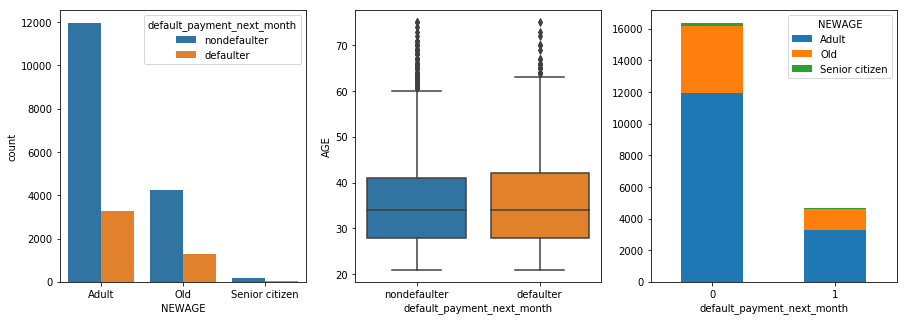

In [18]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=df['NEWAGE'],hue=df['default_payment_next_month'].replace({0:'nondefaulter',1:'defaulter'}),ax=axes[0])
sns.boxplot(df['default_payment_next_month'].replace({0:'nondefaulter',1:'defaulter'}),df['AGE'],ax=axes[1])
a.plot(kind='bar',rot=0,stacked=True,ax=axes[2])
plt.show()
# here 1- default,0-dont default
# so,Majority of people in adult group are not defaulting,out of 12000 roughly 3500 people are defaulting
# In old people ,out of 4000 roughly 800 are defaulting on their credit card
# In 3rd plot,So,as we can see from stacked plot,There is majority of adults in people who are defaulting in loans.
# Also,There are people between age range above 40 and below 60,who take loans more,but they dont pay back on time

In [19]:
# df['EDUCATION'].replace({1:'graduate school',2:'university',3:'high school',4:'others',5:'unknown'})

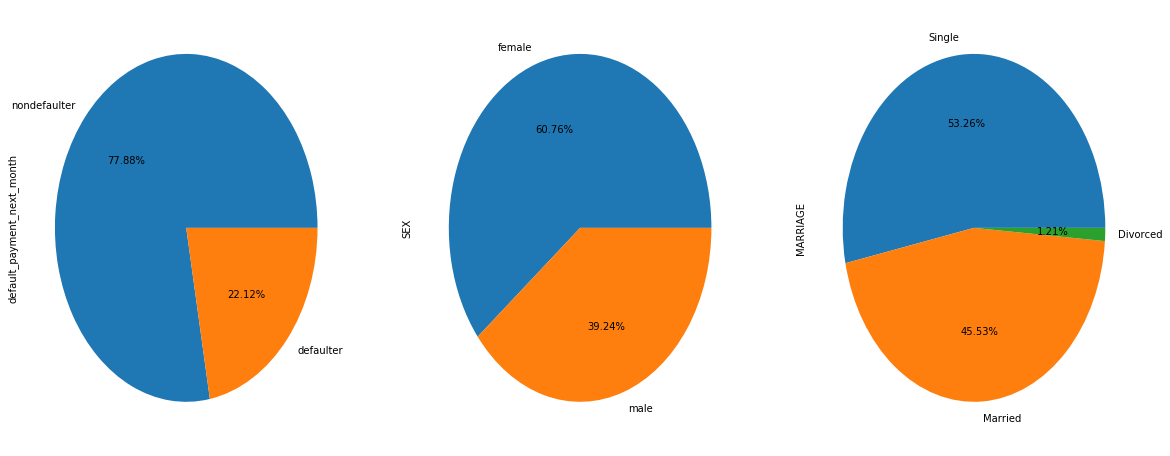

In [20]:
# Creating a crosstab for stacked plot
a=pd.crosstab(dftmp['default_payment_next_month'],dftmp['NEWAGE'])
b=pd.crosstab(df['default_payment_next_month'].replace({0:'nondefaulter',1:'defaulter'}),df['SEX'].replace({1:'male',2:'female'}))
c=pd.crosstab(df['default_payment_next_month'],df['MARRIAGE'])
d=pd.crosstab(df['default_payment_next_month'],df['EDUCATION'])


fig,axes=plt.subplots(1,3,figsize=(20,8))
df['default_payment_next_month'].replace({0:'nondefaulter',1:'defaulter'}).value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
df['SEX'].replace({1:'male',2:'female'}).value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1])
df['MARRIAGE'].replace({0:'Not known',1:'Married',2:'Single',3:'Divorced'}).value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[2])
plt.show()

# From plots shown below we can infer that majority of defaulters genderwise are females.[Females default more than males]
# Also,Percentage wise Single,Married people are almost equal in given data.
# surprisingly most of the people are females who are defaulting on their credit cards as compared to males!# 

In [21]:
df['MARRIAGE'].value_counts()

2    11184
1     9561
3      255
Name: MARRIAGE, dtype: int64

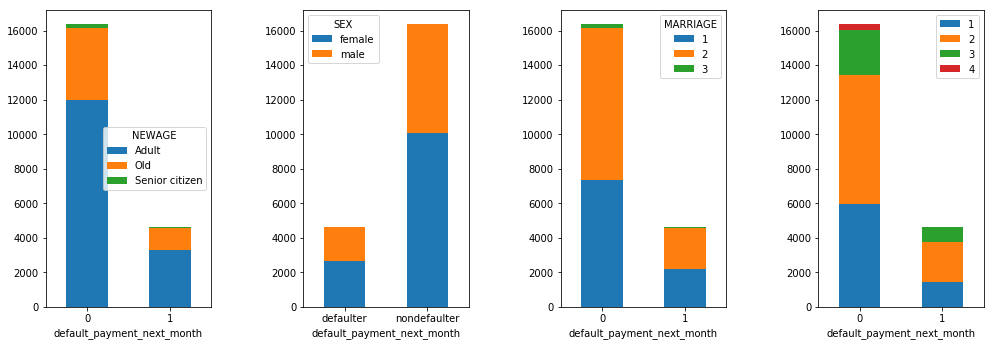

In [22]:
fig,axes=plt.subplots(1,4,figsize=(15,6))
a.plot(kind='bar',rot=0,stacked=True,ax=axes[0])
b.plot(kind='bar',rot=0,stacked=True,ax=axes[1])
c.plot(kind='bar',rot=0,stacked=True,ax=axes[2])
d.plot(kind='bar',rot=0,stacked=True,ax=axes[3])
fig.tight_layout(pad=5)
plt.legend(loc='best')
plt.show()

#Marital status (0=unknown,1=married, 2=single, 3=divorced)
#EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)
# Defaulting people on their loan are mostly adults which is understandable.
# Count of females defautling on their loan is more as compared to males..It is a bit surprising!
# Also,There are few people whose status of marriage is not known[0].only 2 of them have defaulted on their loans[above cell!]
# Majority pf people who are defaulting on their loan are in 3rd plot are either single/married
# Only few are defaulting on their loan being divorced.
# Majority of people who are defaulting on their loan in 4th plot are educated people with university degree
# after that people with graduation degree and then people who have only passed high school!
# So,chances of people defaulting on their loan based on their education,we can infer that people 
# with high education are more dangerous as they are in majority

In [23]:
dfcp=df.copy()

# Modelling Part:

In [24]:

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score


import warnings
warnings.filterwarnings('ignore')

# 1-Logistic Regression:

In [26]:
X=df.drop(['default_payment_next_month','NEWAGE'],axis=1)
y=df['default_payment_next_month']

In [27]:
#Splitting X&y using train_test:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=8)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_prob_train = logreg.predict_proba(X_train)
y_pred_train = logreg.predict(X_train)
y_prob_test = logreg.predict_proba(X_test)
y_pred_test = logreg.predict(X_test)

print('Confusion Matrix - Train:', '\n', confusion_matrix(y_train, y_pred_train))
print('Overall Accuracy', accuracy_score(y_train, y_pred_train))

print('Confusion Matrix - Test:', '\n', confusion_matrix(y_test, y_pred_test))
print('Overall Accuracy', accuracy_score(y_test, y_pred_test))
      
from sklearn.metrics import log_loss
print('log loss: ',log_loss(y_test,y_prob_test))

Confusion Matrix - Train: 
 [[13117     1]
 [ 3682     0]]
Overall Accuracy 0.7807738095238095
Confusion Matrix - Test: 
 [[3237    0]
 [ 962    1]]
Overall Accuracy 0.770952380952381
log loss:  0.5186476637824851


# 2-Decision Tree classifier:

In [28]:
X=df.drop(['default_payment_next_month','NEWAGE'],axis=1)
y=df['default_payment_next_month']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=1)


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,100), 'criterion':['entropy','gini']}
gscv = RandomizedSearchCV(dt, dt_params, cv=5, scoring='roc_auc')
gscv.fit(X, y)
print(gscv.best_params_)

{'min_samples_leaf': 78, 'max_depth': 7, 'criterion': 'entropy'}


In [32]:
gscv_best_DT=gscv.best_params_
DT=DecisionTreeClassifier(**gscv_best_DT)
DT.fit(X,y)
DT.score(X,y)

0.8249047619047619

In [33]:
#Splitting X&y using train_test:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.2,random_state=0)
DT.fit(X_train,y_train)
y_prob_train = DT.predict_proba(X_train)
y_pred_train = DT.predict(X_train)
y_prob_test = DT.predict_proba(X_test)
y_pred_test = DT.predict(X_test)

print('Confusion Matrix - Train:', '\n', confusion_matrix(y_train, y_pred_train))
print('Overall Accuracy', accuracy_score(y_train, y_pred_train))

print('Confusion Matrix - Test:', '\n', confusion_matrix(y_test, y_pred_test))
print('Overall Accuracy', accuracy_score(y_test, y_pred_test))
      
from sklearn.metrics import log_loss
print('log loss: ',log_loss(y_test,y_prob_test))

Confusion Matrix - Train: 
 [[12545   546]
 [ 2366  1343]]
Overall Accuracy 0.8266666666666667
Confusion Matrix - Test: 
 [[3103  161]
 [ 602  334]]
Overall Accuracy 0.8183333333333334
log loss:  0.4412217241927614


# Random Forest Classifier:

In [34]:
X=df.drop(['default_payment_next_month','NEWAGE'],axis=1)
y=df['default_payment_next_month']

In [35]:
# dt = DecisionTreeClassifier()
# RF_params = {['n_estimators':np.arange(1,10), 'max_features':np.arange(1,9)]}
# rfcv = RandomizedSearchCV(dt, dt_params, cv=5, scoring='roc_auc')
# rfcv.fit(X, y)
# print(gscv.best_params_)

In [36]:
auc_avg = []
auc_var = []
for ne in np.arange(1,30):
    RF=RandomForestClassifier(n_estimators=ne,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(RF, X, y, cv=kfold, scoring='roc_auc')
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))

In [37]:
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))

Min Bias Error: 0.2452871848522914  n_estimator: 29  Variance Error: 0.00011585950558413196
Bias Error: 0.2818967286304067  n_estimator: 7 Min Variance Error: 3.7515539577034714e-05


In [38]:
RF=RandomForestClassifier(n_estimators=7,random_state=0)

In [39]:
RF=RandomForestClassifier(n_estimators=7)
RF.fit(X,y)
RF.score(X,y)

0.9796190476190476

In [40]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_prob_train = RF.predict_proba(X_train)
y_pred_train = RF.predict(X_train)
y_prob_test = RF.predict_proba(X_test)
y_pred_test = RF.predict(X_test)

print('Confusion Matrix - Train:', '\n', confusion_matrix(y_train, y_pred_train))
print('Overall Accuracy', accuracy_score(y_train, y_pred_train))

print('Confusion Matrix - Test:', '\n', confusion_matrix(y_test, y_pred_test))
print('Overall Accuracy', accuracy_score(y_test, y_pred_test))
      
from sklearn.metrics import log_loss
print('log loss: ',log_loss(y_test,y_prob_test))

Confusion Matrix - Train: 
 [[13015    76]
 [  265  3444]]
Overall Accuracy 0.9797023809523809
Confusion Matrix - Test: 
 [[2988  276]
 [ 588  348]]
Overall Accuracy 0.7942857142857143
log loss:  1.7346173652695476


In [42]:
# This model is overfit,so we wont be using it.

# End notes:

### - So,we choose Decision Tree classifier as my best model.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=1)


In [47]:
#Splitting X&y using train_test:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.2,random_state=2)
DT.fit(X_train,y_train)
y_prob_train = DT.predict_proba(X_train)
y_pred_train = DT.predict(X_train)
y_prob_test = DT.predict_proba(X_test)
y_pred_test = DT.predict(X_test)

print('Confusion Matrix - Train:', '\n', confusion_matrix(y_train, y_pred_train))
print('Overall Accuracy', accuracy_score(y_train, y_pred_train))

print('Confusion Matrix - Test:', '\n', confusion_matrix(y_test, y_pred_test))
print('Overall Accuracy', accuracy_score(y_test, y_pred_test))
      
from sklearn.metrics import log_loss
print('log loss: ',log_loss(y_test,y_prob_test))

Confusion Matrix - Train: 
 [[12521   534]
 [ 2435  1310]]
Overall Accuracy 0.8232738095238096
Confusion Matrix - Test: 
 [[3164  136]
 [ 577  323]]
Overall Accuracy 0.8302380952380952
log loss:  0.4248045803416762


#### Testing on test data:

In [48]:
# dftest is my test dataframe.I have done same changes in dftrain and dftest.

In [49]:
dfte.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,60000,2,2,1,30,0,0,0,0,0,0,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,200000,2,1,2,29,0,0,0,0,2,0,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,230000,1,1,2,39,0,0,0,0,-2,-2,38395,39943,20650,0,0,0,2500,2000,0,0,0,0
3,150000,1,1,2,40,0,0,0,0,0,0,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,140000,1,2,2,27,0,0,0,0,0,0,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [51]:
y_pred=DT.predict(dfte)

out=pd.DataFrame(y_pred,columns=['default_payment_next_month'])
out['default_payment_next_month'].value_counts() # Final dataframe named out with classification

0    8439
1     561
Name: default_payment_next_month, dtype: int64

In [52]:
out['ID']=dftecp['ID']

out=out[['ID','default_payment_next_month']]

In [56]:
out.to_csv('D:/datasets+minipro/analytics vidhya datasets/credit card defaulter/out.csv')